In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load CIFAR-10

In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train data
trainset = torchvision.datasets.STL10(root='./data',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


# Show images

In [5]:
def show_images(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

truck truck  frog  bird


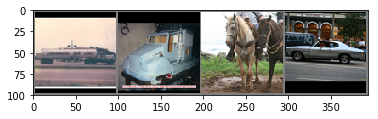

In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
show_images(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Cut Images

In [7]:
def cut_torch_imgs(imgs, shape = (4,4)):
    # imgs is a batch of images -- expected n*c*h*w
    # shape is the shape of each piece
    # returns n*pieces*c*h*w
    assert len(imgs.shape) == 4,"Provide batches of inputs"
    assert not imgs.shape[2] % shape[0], "undivisible height for piece size"
    assert not imgs.shape[3] % shape[1], "undivisible width for piece size"
    
    a = imgs.transpose(1, 2).transpose(2,3)
    c = a[0].shape[-1]
    x,y = a[0].shape[0]//shape[0], a[0].shape[1]//shape[1]
    b = a.reshape(-1,x,shape[0],y,shape[1],c).transpose(2,3)
    b = b.reshape(-1,x*y,shape[0],shape[1],c)
    #transpose to torch accepted standard
    b = b.transpose(3,4).transpose(2,3)
    return b

In [8]:
s = cut_torch_imgs(images[0:4], (32,32))

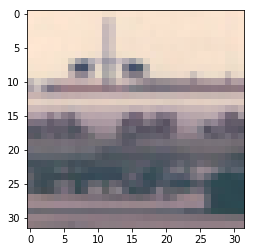

In [9]:
show_images(s[0][4])

In [10]:
images[0].shape

torch.Size([3, 96, 96])

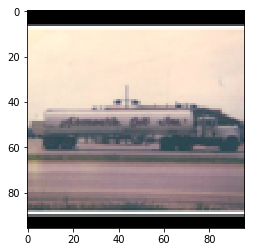

In [11]:
show_images(images[0])

# Models

In [12]:
vgg16 = models.vgg16(pretrained=True)

In [13]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [14]:
# model = nn.Sequential(*list(vgg16.features.children())[:24])
model = nn.Sequential(vgg16.features)

In [15]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [16]:
temp = model(s[0])

In [17]:
temp.view(s[0].shape[0],-1).shape, temp.shape

(torch.Size([9, 512]), torch.Size([9, 512, 1, 1]))

In [18]:
s[0].shape

torch.Size([9, 3, 32, 32])

# LSTM Test 1

In [19]:
torch.randn(1, 1, 3)

tensor([[[ 0.7847,  0.0476, -1.0585]]])

In [20]:
lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)
    print(hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension

(tensor([[[ 0.1268,  0.5679,  0.0891]]]), tensor([[[ 0.3840,  1.4997,  0.2564]]]))
(tensor([[[-0.0011,  0.5606, -0.0342]]]), tensor([[[-0.0055,  1.0881, -0.0643]]]))
(tensor([[[-0.0263,  0.4769, -0.0882]]]), tensor([[[-0.1164,  0.8167, -0.1957]]]))
(tensor([[[ 0.0138,  0.4409, -0.1587]]]), tensor([[[ 0.0452,  0.9942, -0.3640]]]))
(tensor([[[ 0.0285,  0.4577, -0.0833]]]), tensor([[[ 0.0931,  0.6698, -0.3622]]]))


In [21]:
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

tensor([[[-0.0336, -0.1022, -0.3294]],

        [[-0.0569,  0.0967, -0.2259]],

        [[-0.0505,  0.1993, -0.1764]],

        [[-0.0004,  0.2844, -0.2268]],

        [[ 0.0289,  0.3255, -0.1038]]])
(tensor([[[ 0.0289,  0.3255, -0.1038]]]), tensor([[[ 0.0908,  0.4485, -0.4828]]]))


In [ ]:
# Update the progress bar.
            print("Epoch {0:03d}: loss={1:.4f}, val_loss={2:.4f}, acc={3:.2%}, val_acc={4:.2%}".format(
                epoch + 1, loss_history[-1], val_loss_history[-1], acc_history[-1], val_acc_history[-1]))
    print('Training completed')
    history = {
        'loss': loss_history,
        'val_loss': val_loss_history,
        'acc': acc_history,
        'val_acc': val_acc_history
    }
    # Save the model when requested.
    if save_file_name is not None:
        torch.save({
            'history': history,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict()
        }, save_file_name)
    return history